# –†–µ–≥—Ä–µ—Å—Å–∏—è

## –®–∞–≥ 0. –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

## –®–∞–≥ 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö:
 - mpg ‚Äì —Ä–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ (–≤ –º–∏–ª—è—Ö –Ω–∞ –≥–∞–ª–ª–æ–Ω);
 - cylinders ‚Äì —á–∏—Å–ª–æ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ –≤ –¥–≤–∏–≥–∞—Ç–µ–ª–µ;
 - displacement ‚Äì –æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è (–≤ –∫—É–±–∏—á–µ—Å–∫–∏—Ö –¥—é–π–º–∞—Ö);
 - horsepower ‚Äì –º–æ—â–Ω–æ—Å—Ç—å (–≤ –ª–æ—à–∞–¥–∏–Ω—ã—Ö —Å–∏–ª–∞—Ö);
 - weight ‚Äì –º–∞—Å—Å–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–≤ —Ñ—É–Ω—Ç–∞—Ö);
 - acceleration ‚Äì —Ä–∞–∑–≥–æ–Ω –¥–æ 60 –º–∏–ª—å/—á–∞—Å (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö);
 - model year ‚Äì –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞ –º–æ–¥–µ–ª–∏;
 - origin ‚Äì —Ä–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ (1 ‚Äì –°–®–ê, 2 ‚Äì –ï–≤—Ä–æ–ø–∞, 3 ‚Äì –Æ–≥–æ-–í–æ—Å—Ç–æ—á–Ω–∞—è –ê–∑–∏—è);
 - car name ‚Äì –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏.


In [15]:
df = pd.read_csv('auto-mpg.csv')

In [16]:
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
# –í—ã–≤–µ–¥–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
df.dropna(inplace=True)

In [20]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\n–£–¥–∞–ª–µ–Ω–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {initial_shape[0] - df.shape[0]} —Å—Ç—Ä–æ–∫(–∏)")


–£–¥–∞–ª–µ–Ω–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0 —Å—Ç—Ä–æ–∫(–∏)


## –®–∞–≥ 2. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –∏ —à–∫–∞–ª –∏–∑–º–µ—Ä–µ–Ω–∏—è

In [21]:
# –ü—Ä–æ—Å–º–æ—Ç—Ä —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [22]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∫ —Ç–∏–ø—É 'category'
df['origin'] = df['origin'].astype('category')
# –ü–æ–ª–µ 'car name' –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ —Å—Ç—Ä–æ–∫—É (–æ–Ω–æ –Ω–µ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–º –∞–Ω–∞–ª–∏–∑–µ)

## –®–∞–≥ 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

### 3.1 –ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –æ—Ç –º–∞—Å—Å—ã –∞–≤—Ç–æ–º–æ–±–∏–ª—è (weight)

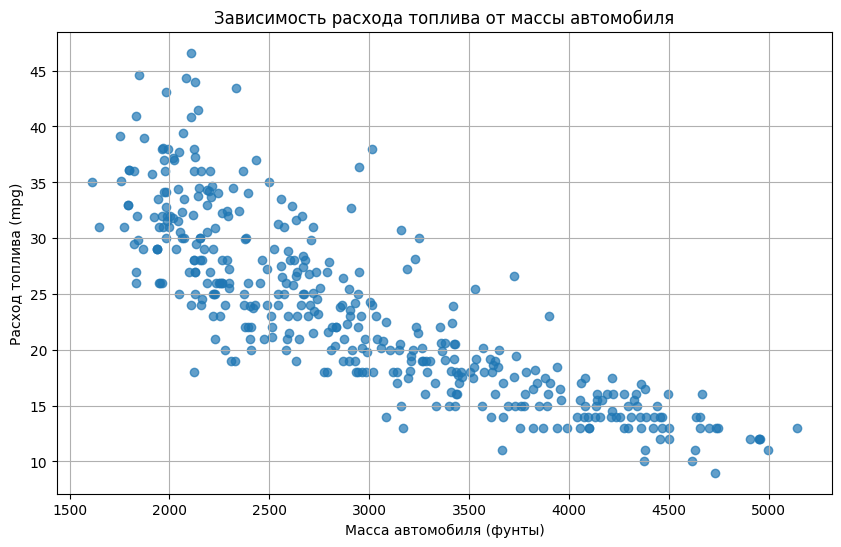

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.7)
plt.xlabel('–ú–∞—Å—Å–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (—Ñ—É–Ω—Ç—ã)')
plt.ylabel('–†–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ (mpg)')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ –æ—Ç –º–∞—Å—Å—ã –∞–≤—Ç–æ–º–æ–±–∏–ª—è')
plt.grid(True)
plt.show()

### 3.2 –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

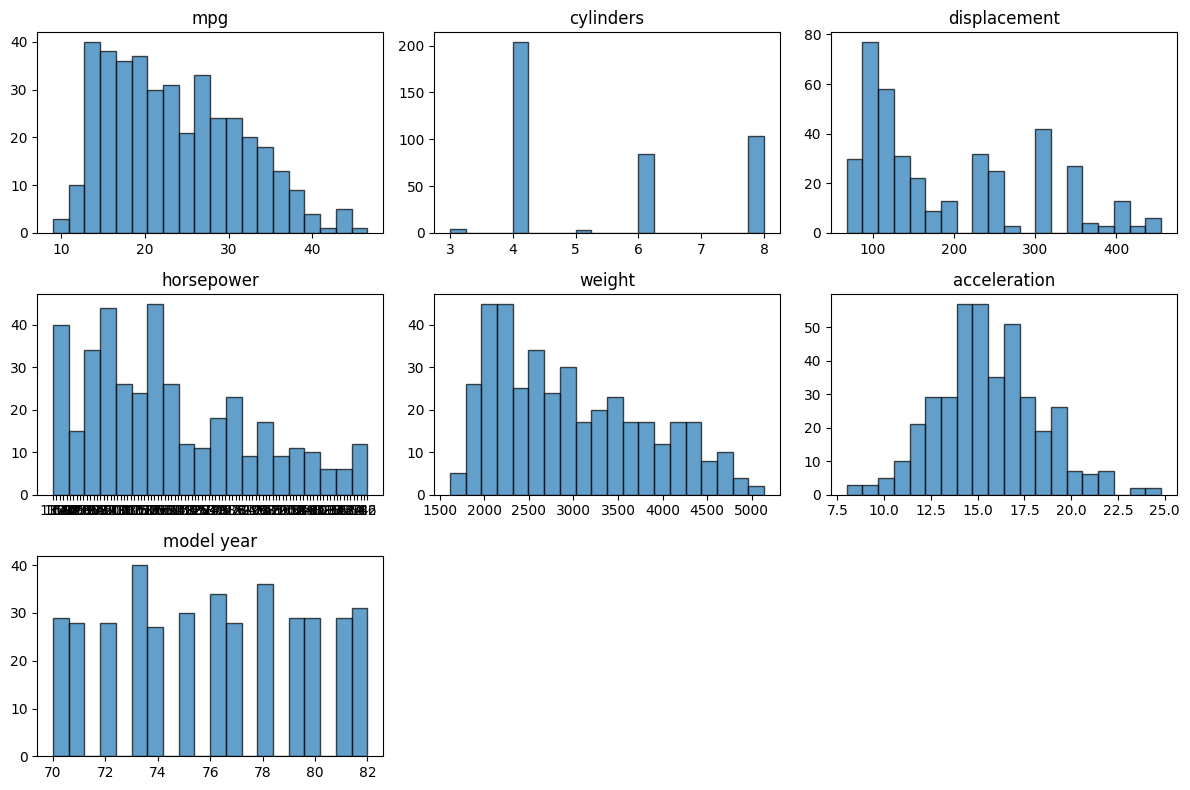

In [24]:
plt.figure(figsize=(12, 8))
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.title(feature)
    plt.tight_layout()
plt.show()

### 3.3 –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800

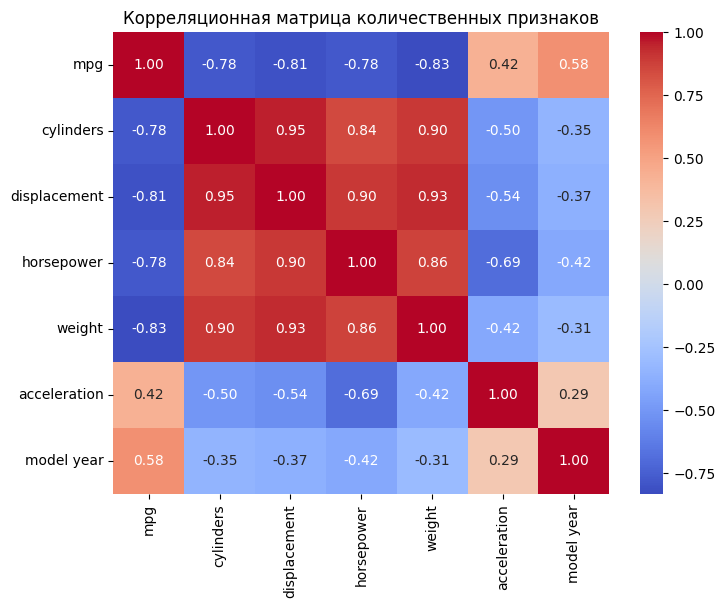

In [30]:
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:")
print(df[numeric_cols].isnull().sum())

df.dropna(subset=numeric_cols, inplace=True)

corr_matrix = df[numeric_cols].corr()
print("\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:")
print(corr_matrix)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç—ã
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

## –®–∞–≥ 4. –ê–Ω–∞–ª–∏–∑ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π —Ñ–∞–∫—Ç–æ—Ä–æ–≤

### 1. –ö—Ä–∏—Ç–µ—Ä–∏–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≥—Ä—É–ø–ø –¥–ª—è —Å–≤—è–∑–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö (–∏–ª–∏ –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö) —Ñ–∞–∫—Ç–æ—Ä–æ–≤ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏

–ü—É—Å—Ç—å –Ω–∞—Å –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç, –≤–ª–∏—è–µ—Ç –ª–∏ —Ä–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ (origin) –Ω–∞ —Ä–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ (mpg). –ó–¥–µ—Å—å origin ‚Äì –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è, –∞ mpg ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è.

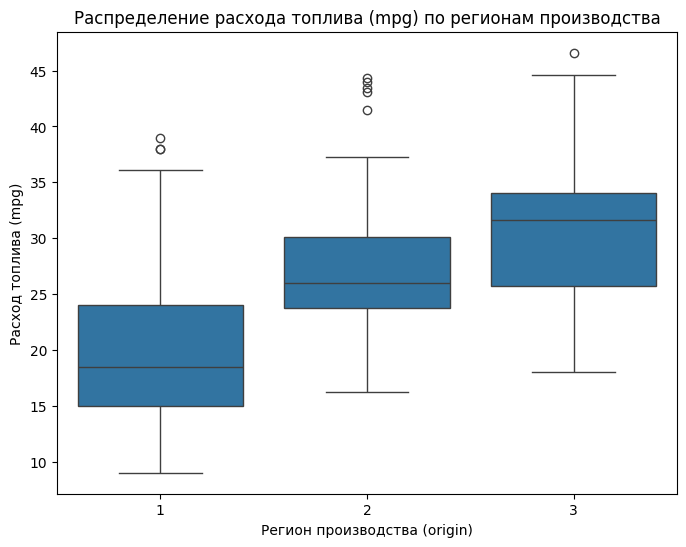

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞')
plt.xlabel('–†–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ (origin)')
plt.ylabel('–†–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ (mpg)')
plt.show()

–î–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –±–æ–ª–µ–µ —á–µ–º –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö –ø—Ä–∏–º–µ–Ω–∏–º –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (ANOVA).


In [35]:
from scipy import stats

# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –≥—Ä—É–ø–ø—ã –ø–æ 'origin'
group1 = df[df['origin'] == 1]['mpg']
group2 = df[df['origin'] == 2]['mpg']
group3 = df[df['origin'] == 3]['mpg']

anova_result = stats.f_oneway(group1, group2, group3)
print("ANOVA - F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:", anova_result.statistic)
print("ANOVA - p-–∑–Ω–∞—á–µ–Ω–∏–µ:", anova_result.pvalue)

ANOVA - F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 96.60153016314952
ANOVA - p-–∑–Ω–∞—á–µ–Ω–∏–µ: 8.673818448010683e-35


### 2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∏ –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö –≤–µ–ª–∏—á–∏–Ω

–ü—Ä–æ–≤–µ–¥–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –º–µ–∂–¥—É —Ä–∞—Å—Ö–æ–¥–æ–º —Ç–æ–ø–ª–∏–≤–∞ (mpg) –∏ –º–∞—Å—Å–æ–π –∞–≤—Ç–æ–º–æ–±–∏–ª—è (weight).

 - –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ü–∏—Ä—Å–æ–Ω–∞:

In [36]:
pearson_corr, p_value_pearson = stats.pearsonr(df['mpg'], df['weight'])
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –º–µ–∂–¥—É mpg –∏ weight:", pearson_corr)
print("p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞:", p_value_pearson)


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ –º–µ–∂–¥—É mpg –∏ weight: -0.8322442148315752
p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞: 6.015296051437158e-102


–î–∞–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É—é—Ç –æ —Ç–æ–º, —á—Ç–æ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏, –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π origin, —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg). –ü–æ—Å–∫–æ–ª—å–∫—É p-–∑–Ω–∞—á–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –º–µ–Ω—å—à–µ 0.05, –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (–æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π mpg –¥–ª—è –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤) –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ä–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ä–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞.

- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –°–ø–∏—Ä–º–µ–Ω–∞:

In [37]:
spearman_corr, p_value_spearman = stats.spearmanr(df['mpg'], df['weight'])
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É mpg –∏ weight:", spearman_corr)
print("p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞:", p_value_spearman)


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ –º–µ–∂–¥—É mpg –∏ weight: -0.8755851198739869
p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞: 2.662377938025222e-125


–û–±–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–ü–∏—Ä—Å–æ–Ω–∞ –∏ –°–ø–∏—Ä–º–µ–Ω–∞) —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Å–∏–ª—å–Ω—É—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É —Ä–∞—Å—Ö–æ–¥–æ–º —Ç–æ–ø–ª–∏–≤–∞ (mpg) –∏ –≤–µ—Å–æ–º –∞–≤—Ç–æ–º–æ–±–∏–ª—è (weight). –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –≤–µ—Å–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–Ω–∏–∂–µ–Ω–∏–µ –µ–≥–æ —Ç–æ–ø–ª–∏–≤–Ω–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –û—á–µ–Ω—å –Ω–∏–∑–∫–∏–µ p-–∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —ç—Ç–æ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏.

### 3. –¢–∞–±–ª–∏—Ü—ã —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å–≤—è–∑–∏ –¥–≤—É—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤

–ü–æ—Å—Ç—Ä–æ–∏–º —Ç–∞–±–ª–∏—Ü—É —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö origin –∏ cylinders (–ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –º–æ–∂–Ω–æ —Ç—Ä–∞–∫—Ç–æ–≤–∞—Ç—å –∫–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –ª–∏–±–æ –∫–∞–∫ –ø–æ—Ä—è–¥–∫–æ–≤—ã–µ).

In [38]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏:
contingency_table = pd.crosstab(df['origin'], df['cylinders'])
print("–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É origin –∏ cylinders:")
print(contingency_table)


–¢–∞–±–ª–∏—Ü–∞ —Å–æ–ø—Ä—è–∂–µ–Ω–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É origin –∏ cylinders:
cylinders  3   4  5   6    8
origin                      
1          0  69  0  73  103
2          0  61  3   4    0
3          4  69  0   6    0


In [39]:
# –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç (—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç):
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:", chi2)
print("p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç:", p)
print("–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã:", dof)
print("–û–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:\n", expected)


–•–∏-–∫–≤–∞–¥—Ä–∞—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 180.71869417150074
p-–∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç: 7.272757264481584e-35
–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: 8
–û–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:
 [[  2.5        124.375        1.875       51.875       64.375     ]
 [  0.69387755  34.52040816   0.52040816  14.39795918  17.86734694]
 [  0.80612245  40.10459184   0.60459184  16.72704082  20.75765306]]


–¢–µ—Å—Ç —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ origin –∏ cylinders —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å (p-–∑–Ω–∞—á–µ–Ω–∏–µ ‚â™ 0.05). –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–µ–≥–∏–æ–Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞.

### –í—ã–≤–æ–¥

1. –ì—Ä—É–ø–ø–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ (ANOVA):
–†–∞–∑–ª–∏—á–∏—è –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –º–µ–∂–¥—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è–º–∏ –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ —è–≤–ª—è—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º–∏, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–∞ –Ω–∞ —Ç–æ–ø–ª–∏–≤–Ω—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.

2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑:
–°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–∏–ª—å–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É —Ä–∞—Å—Ö–æ–¥–æ–º —Ç–æ–ø–ª–∏–≤–∞ –∏ –≤–µ—Å–æ–º –∞–≤—Ç–æ–º–æ–±–∏–ª—è, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –±–æ–ª–µ–µ —Ç—è–∂–µ–ª—ã–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ –∏–º–µ—é—Ç –º–µ–Ω—å—à—É—é —Ç–æ–ø–ª–∏–≤–Ω—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.

3. –ê–Ω–∞–ª–∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
–ú–µ–∂–¥—É —Ä–µ–≥–∏–æ–Ω–∞–º–∏ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –∏ —á–∏—Å–ª–æ–º —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ç–µ—Å—Ç–∞ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤—Å–µ –º–µ—Ç–æ–¥—ã –∞–Ω–∞–ª–∏–∑–∞ (ANOVA, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∏ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç —Ç–µ—Å—Ç) —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —Ç–æ, —á—Ç–æ:

 - –†–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤.

 - –í–µ—Å –∞–≤—Ç–æ–º–æ–±–∏–ª—è —è–≤–ª—è–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º, –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–º —Å —Ç–æ–ø–ª–∏–≤–Ω–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é.

# –®–∞–≥ 5

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ):
–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –¥–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π, –ø—Ä–æ–∏–∑–≤–µ–¥—ë–Ω–Ω—ã—Ö –≤ —Ä–∞–∑–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö (origin), –æ–¥–∏–Ω–∞–∫–æ–≤–æ, —Ç–æ –µ—Å—Ç—å

H
0
‚Äã
 :Œº
1
‚Äã
 =Œº
2
‚Äã
 =Œº
3
‚Äã


 –≥–¥–µ
ùúá
1
Œº
1
‚Äã
 ,
ùúá
2
Œº
2
‚Äã
  –∏
ùúá
3
Œº
3
‚Äã
  ‚Äî —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è mpg –¥–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –∏–∑ —Ä–µ–≥–∏–æ–Ω–æ–≤ 1, 2 –∏ 3 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

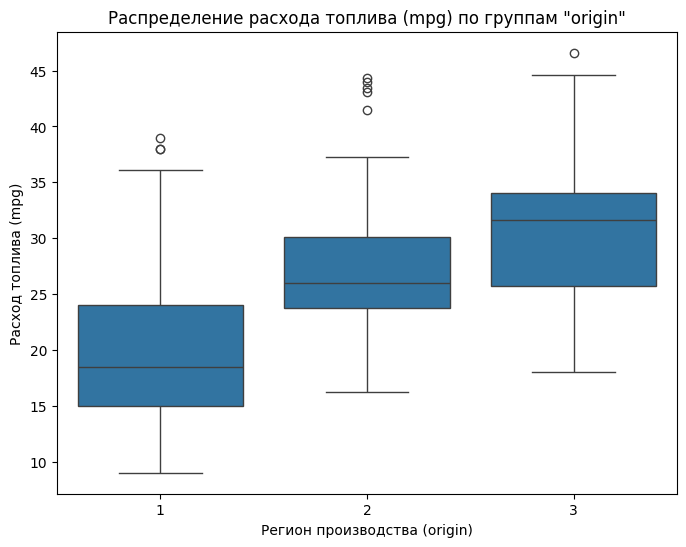

In [31]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö: –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ boxplot –¥–ª—è mpg –ø–æ –≥—Ä—É–ø–ø–∞–º 'origin'
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –ø–æ –≥—Ä—É–ø–ø–∞–º "origin"')
plt.xlabel('–†–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ (origin)')
plt.ylabel('–†–∞—Å—Ö–æ–¥ —Ç–æ–ø–ª–∏–≤–∞ (mpg)')
plt.show()

<b>–û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ –≤—ã–±–æ—Ä–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è</b>

–ü–æ—Å–∫–æ–ª—å–∫—É —É –Ω–∞—Å –∏–º–µ–µ—Ç—Å—è –æ–¥–Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (mpg) –∏ –æ–¥–∏–Ω –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ (origin) —Å —Ç—Ä–µ–º—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏, –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (ANOVA).
ANOVA –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å—Ä–∞–≤–Ω–∏—Ç—å —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª–µ–µ —á–µ–º –¥–≤—É—Ö –≥—Ä—É–ø–ø, –æ—Ü–µ–Ω–∏–≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–µ–∂–≥—Ä—É–ø–ø–æ–≤–æ–π –∏ –≤–Ω—É—Ç—Ä–∏–≥—Ä—É–ø–ø–æ–≤–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏.

In [32]:
from scipy.stats import stats

# –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –≥—Ä—É–ø–ø—ã –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é 'origin'
group1 = df[df['origin'] == 1]['mpg']
group2 = df[df['origin'] == 2]['mpg']
group3 = df[df['origin'] == 3]['mpg']

# –ü—Ä–æ–≤–µ–¥–µ–º –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (ANOVA)
anova_result = stats.f_oneway(group1, group2, group3)

# –í—ã–≤–µ–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã ANOVA:")
print("F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:", anova_result.statistic)
print("p-–∑–Ω–∞—á–µ–Ω–∏–µ:", anova_result.pvalue)

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞:
alpha = 0.05  # —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
if anova_result.pvalue < alpha:
    print("p-–∑–Ω–∞—á–µ–Ω–∏–µ –º–µ–Ω—å—à–µ 0.05, –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.")
    print("–°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ mpg –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.")
else:
    print("p-–∑–Ω–∞—á–µ–Ω–∏–µ –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–æ 0.05, –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–∫–ª–æ–Ω—è—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É.")
    print("–ù–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ mpg –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.")

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã ANOVA:
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 96.60153016314952
p-–∑–Ω–∞—á–µ–Ω–∏–µ: 8.673818448010683e-35
p-–∑–Ω–∞—á–µ–Ω–∏–µ –º–µ–Ω—å—à–µ 0.05, –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.
–°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ mpg –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.


/tmp/ipykernel_2679647/4001531921.py:9: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  anova_result = stats.f_oneway(group1, group2, group3)


<b>–§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–≤–æ–¥–∞ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∫—Ä–∏—Ç–µ—Ä–∏—è</b>

–¢–∞–∫ –∫–∞–∫ p-–∑–Ω–∞—á–µ–Ω–∏–µ (‚âà 8.67√ó10‚Åª¬≥‚Åµ) –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (Œ± = 0.05), –º—ã –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –∑–Ω–∞—á–µ–Ω–∏–∏ —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg). –¢–æ –µ—Å—Ç—å —Ä–µ–≥–∏–æ–Ω –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞ –æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–Ω–æ—Å—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π.

# –®–∞–≥ 6

## 1. –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [40]:
# –í—ã–±–∏—Ä–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[numeric_features].copy()

In [41]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'origin' –≤ dummy-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (one-hot encoding)
origin_dummies = pd.get_dummies(df['origin'], prefix='origin', drop_first=True)
X = pd.concat([X, origin_dummies], axis=1)

In [42]:
# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = df['mpg']

In [43]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é (80%) –∏ —Ç–µ—Å—Ç–æ–≤—É—é (20%) –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [44]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred_linear = linear_model.predict(X_test)

In [46]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è:")
print("MSE: {:.2f}".format(mse_linear))
print("RMSE: {:.2f}".format(rmse_linear))
print("MAE: {:.2f}".format(mae_linear))
print("R2: {:.2f}".format(r2_linear))

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è:
MSE: 10.60
RMSE: 3.26
MAE: 2.46
R2: 0.79


In [47]:
# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏ (–∑–Ω–∞—á–∏–º–æ—Å—Ç—å –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —á–µ—Ä–µ–∑ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã)
print("\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏:")
coeff_linear = pd.Series(linear_model.coef_, index=X.columns)
print(coeff_linear)
print("–ü–µ—Ä–µ—Ö–≤–∞—Ç (Intercept):", linear_model.intercept_)


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏:
cylinders      -0.342101
displacement    0.019206
horsepower     -0.021620
weight         -0.006423
acceleration    0.042198
model year      0.797161
origin_2        2.875499
origin_3        3.205969
dtype: float64
–ü–µ—Ä–µ—Ö–≤–∞—Ç (Intercept): -19.33193002500678


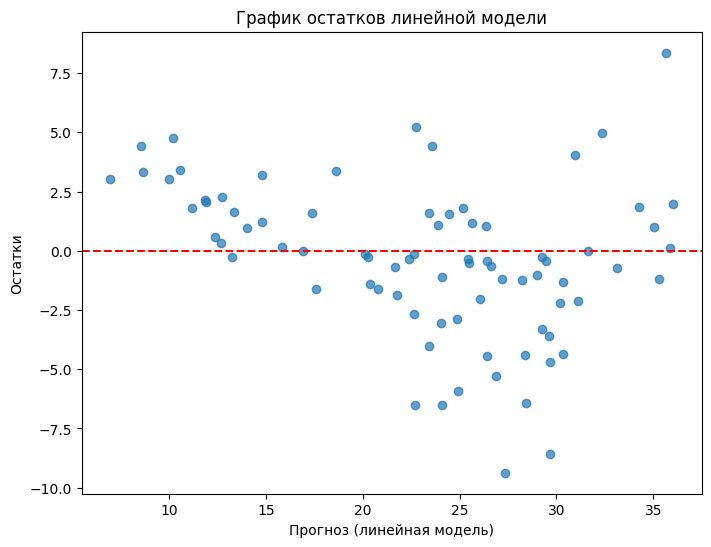

In [48]:
# –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤: —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals_linear = y_test - y_pred_linear
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals_linear, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('–ü—Ä–æ–≥–Ω–æ–∑ (–ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å)')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏')
plt.show()

## 3. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ (–ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è, degree=2)

In [49]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [50]:
# –°–æ–∑–¥–∞–µ–º –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
y_pred_poly = poly_model.predict(X_test_poly)

In [52]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\n–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (degree=2):")
print("MSE: {:.2f}".format(mse_poly))
print("RMSE: {:.2f}".format(rmse_poly))
print("MAE: {:.2f}".format(mae_poly))
print("R2: {:.2f}".format(r2_poly))


–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (degree=2):
MSE: 7.75
RMSE: 2.78
MAE: 2.03
R2: 0.85


In [53]:
# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ (–±—É–¥–µ—Ç –º–Ω–æ–≥–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –∏–∑-–∑–∞ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π)
print("\n–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏:")
print(poly_model.coef_)
print("–ü–µ—Ä–µ—Ö–≤–∞—Ç (Intercept):", poly_model.intercept_)


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏:
[ 1.16483859e+01 -6.45758386e-01  1.74451506e-01  1.56944107e-02
 -8.78703359e+00 -6.67294915e+00 -1.93116316e+01 -1.60012147e+01
 -8.93858117e-01  1.06052216e-02  1.68467502e-02  1.51810005e-03
  4.14761846e-01 -2.16842605e-01 -1.79692234e-01  2.23200910e+00
 -2.40458873e-05  1.04506816e-04  1.23127417e-06 -2.52724924e-03
  7.94770074e-03 -3.99939026e-02  2.10841124e-02 -1.00969016e-04
 -3.54582087e-05 -6.48121083e-03 -1.51792227e-03  2.08865829e-02
 -2.09230849e-02  3.96178433e-07  7.44098212e-06 -3.60388226e-04
  4.20514861e-04 -2.94792965e-04  1.61272717e-03  9.27902991e-02
  1.08112847e+00  6.36875098e-01  4.45566979e-02  3.17111683e-01
  1.78946914e-01 -1.93116316e+01  0.00000000e+00 -1.60012147e+01]
–ü–µ—Ä–µ—Ö–≤–∞—Ç (Intercept): 331.06210908975044


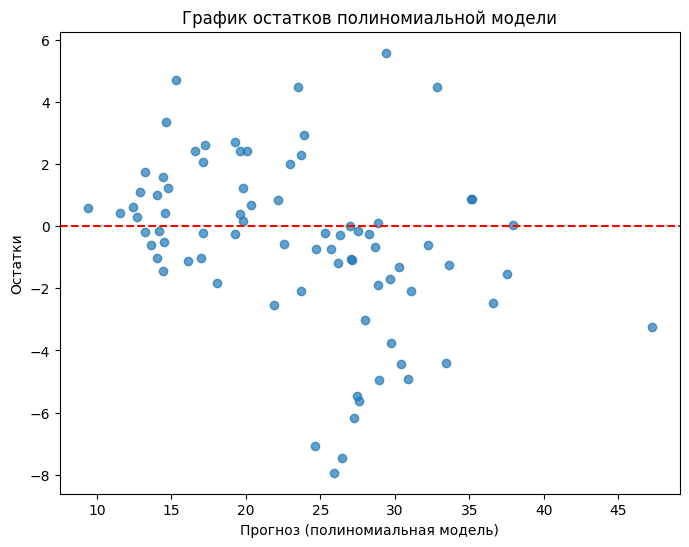

In [54]:
# –ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('–ü—Ä–æ–≥–Ω–æ–∑ (–ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å)')
plt.ylabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏')
plt.show()

## 5. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∏ –∏—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥

In [56]:
print("\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:")
print("–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å - R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2_linear, rmse_linear, mae_linear))
print("–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å - R2: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(r2_poly, rmse_poly, mae_poly))

if r2_poly > r2_linear:
    best_model = "–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å"
else:
    best_model = "–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å"

print("\n–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥:")
print("–ü–æ—Å—Ç—Ä–æ–µ–Ω—ã –¥–≤–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª—è.")
print("–ê–Ω–∞–ª–∏–∑ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, –≥—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –∏ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ (MSE, RMSE, MAE, R2) –ø–æ–∑–≤–æ–ª—è—é—Ç –æ—Ü–µ–Ω–∏—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π.")
print("–ü—Ä–æ–≥–Ω–æ–∑ –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π.")
print("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ–∫–∞–∑–∞–ª–æ, —á—Ç–æ {} –∏–º–µ–µ—Ç –ª—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞—á–µ—Å—Ç–≤–∞ (–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π R2 –∏/–∏–ª–∏ –º–µ–Ω—å—à–∏–µ –æ—à–∏–±–∫–∏).".format(best_model))


–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:
–õ–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å - R2: 0.79, RMSE: 3.26, MAE: 2.46
–ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å - R2: 0.85, RMSE: 2.78, MAE: 2.03

–ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥:
–ü–æ—Å—Ç—Ä–æ–µ–Ω—ã –¥–≤–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Ö–æ–¥–∞ —Ç–æ–ø–ª–∏–≤–∞ (mpg) –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª—è.
–ê–Ω–∞–ª–∏–∑ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤, –≥—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –∏ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ (MSE, RMSE, MAE, R2) –ø–æ–∑–≤–æ–ª—è—é—Ç –æ—Ü–µ–Ω–∏—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π.
–ü—Ä–æ–≥–Ω–æ–∑ –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–±–µ–∏—Ö –º–æ–¥–µ–ª–µ–π.
–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ–∫–∞–∑–∞–ª–æ, —á—Ç–æ –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç –ª—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞—á–µ—Å—Ç–≤–∞ (–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π R2 –∏/–∏–ª–∏ –º–µ–Ω—å—à–∏–µ –æ—à–∏–±–∫–∏).
